In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import pyMELTScalc as M
import pickle

sys.path.append(r'H:\My Drive\2022\GitHub\pyMELTScalc\MELTS')

import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

In [2]:
M.__version__

'0.1.14'

In [3]:
Exp = pd.read_excel('Villiger2007.xlsx')
Elements = ['SiO2_Liq', 'TiO2_Liq', 'Al2O3_Liq', 'FeOt_Liq', 'MgO_Liq',
            'CaO_Liq', 'Na2O_Liq', 'K2O_Liq']

In [4]:
bulk = {'SiO2_Liq': Exp['SiO2_Liq'].loc[0], 
        'TiO2_Liq': Exp['TiO2_Liq'].loc[0], 
        'Al2O3_Liq': Exp['Al2O3_Liq'].loc[0], 
        'FeOt_Liq': Exp['FeOt_Liq'].loc[0], 
        'MnO_Liq': Exp['MnO_Liq'].loc[0], 
        'MgO_Liq': Exp['MgO_Liq'].loc[0], 
        'CaO_Liq': Exp['CaO_Liq'].loc[0], 
        'Na2O_Liq': Exp['Na2O_Liq'].loc[0], 
        'K2O_Liq': Exp['K2O_Liq'].loc[0],
        'Cr2O3_Liq': 0.01,
        'P2O5_Liq': 0.0,
        'H2O_Liq': 0.2, 
        'CO2_Liq': 0.0,
       'Fe3Fet_Liq': 0.0}


In [5]:
Exp[Elements] = 100*Exp[Elements].values/np.nansum(Exp[Elements], axis = 1).reshape(8,1)

In [6]:
P_bar = np.array([1000,4000,7000,10000])

In [7]:
Results_Holland = M.multi_path(Model = "Holland", comp = bulk,
                       T_end_C = 1075, dt_C = 2, 
                       P_bar = P_bar, find_liquidus = True,
                       H2O_Liq = 0.2, Frac_solid = True,
                              timeout = 600, Fe3Fet_Liq = 0.064)

Results_MELTSv120 = M.multi_path(Model = "MELTSv1.2.0", comp = bulk,
                       T_end_C = 1000, dt_C = 2, 
                       P_bar = P_bar, find_liquidus = True,
                       H2O_Liq = 0.2,
                       Frac_solid = True, Frac_fluid = True,
                      fO2_buffer = "FMQ", fO2_offset = -2,
                              timeout = 600)

Results_MELTSv102 = M.multi_path(Model = "MELTSv1.0.2", comp = bulk,
                       T_end_C = 1000, dt_C = 2, 
                       P_bar = P_bar, find_liquidus = True,
                       H2O_Liq = 0.2,
                       Frac_solid = True, Frac_fluid = True,
                      fO2_buffer = "FMQ", fO2_offset = -2,
                              timeout = 300)

Results_pMELTS = M.multi_path(Model = "pMELTS", comp = bulk,
                       T_end_C = 1000, dt_C = 2, 
                       P_bar = P_bar, find_liquidus = True,
                       H2O_Liq = 0.2,
                       Frac_solid = True, Frac_fluid = True,
                      fO2_buffer = "FMQ", fO2_offset = -2,
                              timeout = 600)

  0%|          | 0/1 [00:00<?, ?it/s]

Running Holland calculations 0 to 3.0 ... Complete (time taken = 201.94 seconds)
dict_keys(['index = 3', 'index = 2', 'index = 1', 'index = 0'])


  0%|          | 0/1 [00:00<?, ?it/s]

Running MELTSv1.2.0 calculations 0 to 3.0 ... Complete (time taken = 82.07 seconds)
dict_keys(['index = 0', 'index = 2', 'index = 1', 'index = 3'])


  0%|          | 0/1 [00:00<?, ?it/s]

Running MELTSv1.0.2 calculations 0 to 3.0 ... Complete (time taken = 74.44 seconds)
dict_keys(['index = 0', 'index = 2', 'index = 1', 'index = 3'])


  0%|          | 0/1 [00:00<?, ?it/s]

Running pMELTS calculations 0 to 3.0 ... Complete (time taken = 74.84 seconds)
dict_keys(['index = 1', 'index = 2', 'index = 3', 'index = 0'])


In [8]:
with open('Villiger_Results_Holland.pck', 'wb') as file_handle:
    pickle.dump(Results_Holland, file_handle)
    
with open('Villiger_Results_pMELTS.pck', 'wb') as file_handle:
    pickle.dump(Results_pMELTS, file_handle)
    
with open('Villiger_Results_MELTSv102.pck', 'wb') as file_handle:
    pickle.dump(Results_MELTSv102, file_handle)
    
with open('Villiger_Results_MELTSv120.pck', 'wb') as file_handle:
    pickle.dump(Results_MELTSv120, file_handle)

In [9]:
with open('Villiger_Results_Holland.pck', 'rb') as file_handle:
    Results_Holland = pickle.load(file_handle)
    
with open('Villiger_Results_pMELTS.pck', 'rb') as file_handle:
    Results_pMELTS = pickle.load(file_handle)

with open('Villiger_Results_MELTSv102.pck', 'rb') as file_handle:
    Results_MELTSv102 = pickle.load(file_handle)

with open('Villiger_Results_MELTSv120.pck', 'rb') as file_handle:
    Results_MELTSv120 = pickle.load(file_handle)

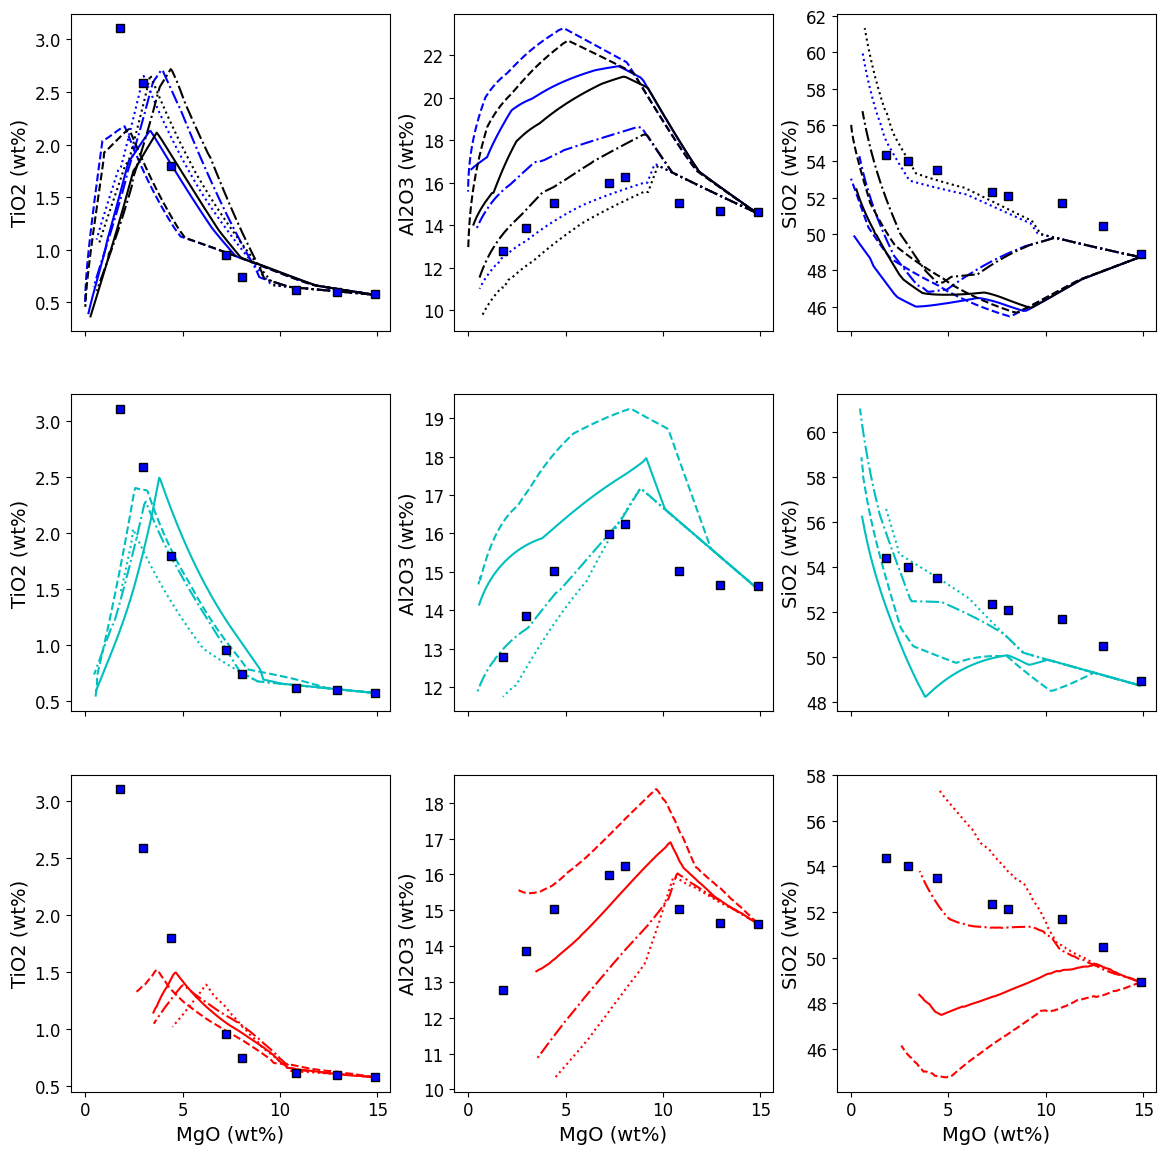

In [10]:
f, a = plt.subplots(3,3, figsize = (14,14), sharex = True)

y = ['TiO2_Liq', 'Al2O3_Liq', 'SiO2_Liq']

Elements = ['SiO2_Liq', 'TiO2_Liq', 'Al2O3_Liq', 'FeOt_Liq', 'MgO_Liq',
            'CaO_Liq', 'Na2O_Liq', 'K2O_Liq']
for index in Results_MELTSv120:
    Results_pMELTS[index]['All'][Elements] = 100*Results_pMELTS[index]['All'][Elements].values/np.nansum(Results_pMELTS[index]['All'][Elements], axis = 1).reshape(len(Results_pMELTS[index]['All']['SiO2_Liq']),1)
    # Results_MELTSv102[index]['All'][Elements] = 100*Results_MELTSv102[index]['All'][Elements].values/np.nansum(Results_MELTSv102[index]['All'][Elements], axis = 1).reshape(len(Results_MELTSv102[index]['All']['SiO2_Liq']),1)
    Results_MELTSv120[index]['All'][Elements] = 100*Results_MELTSv120[index]['All'][Elements].values/np.nansum(Results_MELTSv120[index]['All'][Elements], axis = 1).reshape(len(Results_MELTSv120[index]['All']['SiO2_Liq']),1)

Elements = ['SiO2', 'TiO2', 'Al2O3', 'FeO', 'MgO',
            'CaO', 'Na2O', 'K2O']
for index in Results_Holland:
    Results_Holland[index]['liq'][Elements] = 100*Results_Holland[index]['liq'][Elements].values/np.nansum(Results_Holland[index]['liq'][Elements], axis = 1).reshape(len(Results_Holland[index]['liq']['SiO2']),1)
    

lines = [':', '-', '--', '-.']    

for i in range(3):    
    a[0][i].plot(Results_MELTSv102['index = 0']['liquid1']['MgO_Liq'],
                Results_MELTSv102['index = 0']['liquid1'][y[i]], ':', color = 'b')
    a[0][i].plot(Results_MELTSv102['index = 1']['liquid1']['MgO_Liq'],
                Results_MELTSv102['index = 1']['liquid1'][y[i]], '-.', color = 'b')
    a[0][i].plot(Results_MELTSv102['index = 2']['liquid1']['MgO_Liq'],
                Results_MELTSv102['index = 2']['liquid1'][y[i]], '-', color = 'b')
    a[0][i].plot(Results_MELTSv102['index = 3']['liquid1']['MgO_Liq'],
                Results_MELTSv102['index = 3']['liquid1'][y[i]], '--', color = 'b')
    
    a[0][i].plot(Results_MELTSv120['index = 0']['liquid1']['MgO_Liq'],
                Results_MELTSv120['index = 0']['liquid1'][y[i]], ':', color = 'k')
    a[0][i].plot(Results_MELTSv120['index = 1']['liquid1']['MgO_Liq'],
                Results_MELTSv120['index = 1']['liquid1'][y[i]], '-.', color = 'k')
    a[0][i].plot(Results_MELTSv120['index = 2']['liquid1']['MgO_Liq'],
                Results_MELTSv120['index = 2']['liquid1'][y[i]], '-', color = 'k')
    a[0][i].plot(Results_MELTSv120['index = 3']['liquid1']['MgO_Liq'],
                Results_MELTSv120['index = 3']['liquid1'][y[i]], '--', color = 'k')
    
    a[0][i].plot(Exp['MgO_Liq'], Exp[y[i]], 'sk',
                markerfacecolor = 'blue')
    a[0][i].set_ylabel(y[i][:-4] + ' (wt%)')

    a[1][i].plot(Results_pMELTS['index = 0']['liquid1']['MgO_Liq'],
                Results_pMELTS['index = 0']['liquid1'][y[i]], ':', color = 'c')
    a[1][i].plot(Results_pMELTS['index = 1']['liquid1']['MgO_Liq'],
                Results_pMELTS['index = 1']['liquid1'][y[i]], '-.', color = 'c')
    a[1][i].plot(Results_pMELTS['index = 2']['liquid1']['MgO_Liq'],
                Results_pMELTS['index = 2']['liquid1'][y[i]], '-', color = 'c')
    a[1][i].plot(Results_pMELTS['index = 3']['liquid1']['MgO_Liq'],
                Results_pMELTS['index = 3']['liquid1'][y[i]], '--', color = 'c')
    
    a[1][i].plot(Exp['MgO_Liq'], Exp[y[i]], 'sk',
                markerfacecolor = 'blue')
    a[1][i].set_ylabel(y[i][:-4] + ' (wt%)')
    
    a[2][i].plot(Results_Holland['index = 0']['liq']['MgO'],
                Results_Holland['index = 0']['liq'][y[i][:-4]], ':', color = 'r')
    a[2][i].plot(Results_Holland['index = 1']['liq']['MgO'],
                Results_Holland['index = 1']['liq'][y[i][:-4]], '-.', color = 'r')
    a[2][i].plot(Results_Holland['index = 2']['liq']['MgO'],
                Results_Holland['index = 2']['liq'][y[i][:-4]], '-', color = 'r')
    a[2][i].plot(Results_Holland['index = 3']['liq']['MgO'],
                Results_Holland['index = 3']['liq'][y[i][:-4]], '--', color = 'r')    
    a[2][i].plot(Exp['MgO_Liq'], Exp[y[i]], 'sk',
                markerfacecolor = 'blue')
    a[2][i].set_ylabel(y[i][:-4] + ' (wt%)')
    
    a[2][i].set_xlabel('MgO (wt%)')
    
#plt.savefig("Villiger.eps", dpi = 300, bbox_inches='tight')  

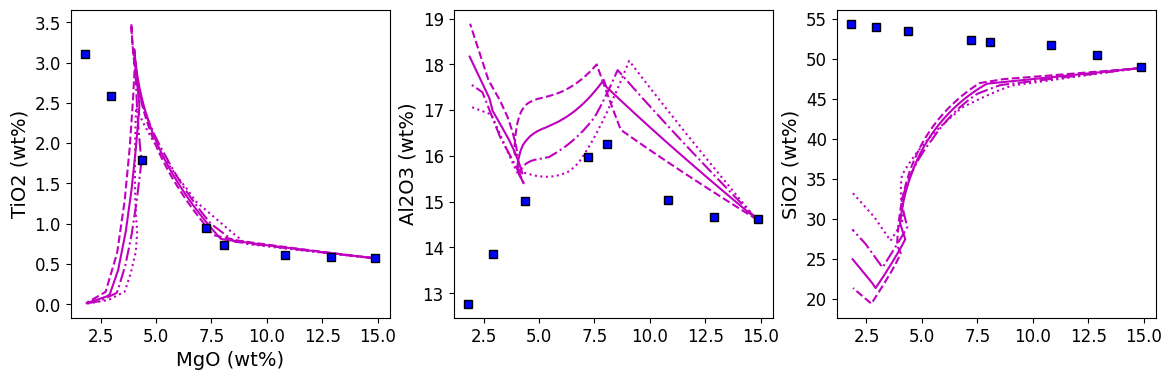

In [30]:
f, a = plt.subplots(1,3, figsize = (14,4), sharex = True)
pet10=pd.read_excel('Villiger_Petrolog_10kbar.xlsx', sheet_name='Petrolog_Output_FRAC')
pet7=pd.read_excel('Villiger_Petrolog_7kbar.xlsx', sheet_name='Petrolog_Output_FRAC')
pet4=pd.read_excel('Villiger_Petrolog_4kbar.xlsx', sheet_name='Petrolog_Output_FRAC')
pet1=pd.read_excel('Villiger_Petrolog_1kbar.xlsx', sheet_name='Petrolog_Output_FRAC')
y = ['TiO2_Liq', 'Al2O3_Liq', 'SiO2_Liq']
y2 = [' TiO2_melt', 'Al2O3_melt', ' SiO2_melt']

Elements = [' SiO2_melt', ' TiO2_melt', 'Al2O3_melt', 'Fe2O3_melt', '  FeO_melt', '  MnO_melt', '  MgO_melt', '  CaO_melt', ' Na2O_melt', '  K2O_melt']

pet10[Elements] = 100*pet10[Elements].values/np.nansum(pet10[Elements], axis = 1).reshape(len(pet10[' SiO2_melt']),1)
pet7[Elements] = 100*pet7[Elements].values/np.nansum(pet7[Elements], axis = 1).reshape(len(pet7[' SiO2_melt']),1)
pet4[Elements] = 100*pet4[Elements].values/np.nansum(pet4[Elements], axis = 1).reshape(len(pet4[' SiO2_melt']),1)
pet1[Elements] = 100*pet1[Elements].values/np.nansum(pet1[Elements], axis = 1).reshape(len(pet1[' SiO2_melt']),1)

for i in range(3):
    a[i].plot(pet1['  MgO_melt'],
                 pet1[y2[i]], ':', color = 'm')
    a[i].plot(pet4['  MgO_melt'],
                 pet4[y2[i]], '-.', color = 'm')
    a[i].plot(pet7['  MgO_melt'],
                 pet7[y2[i]], '-', color = 'm')
    a[i].plot(pet10['  MgO_melt'],
                 pet10[y2[i]], '--', color = 'm')
    
    a[i].plot(Exp['MgO_Liq'], Exp[y[i]], 'sk', mfc = 'blue')

    a[i].set_ylabel(y[i][:-4] + ' (wt%)')
    a[0].set_xlabel('MgO (wt%)')


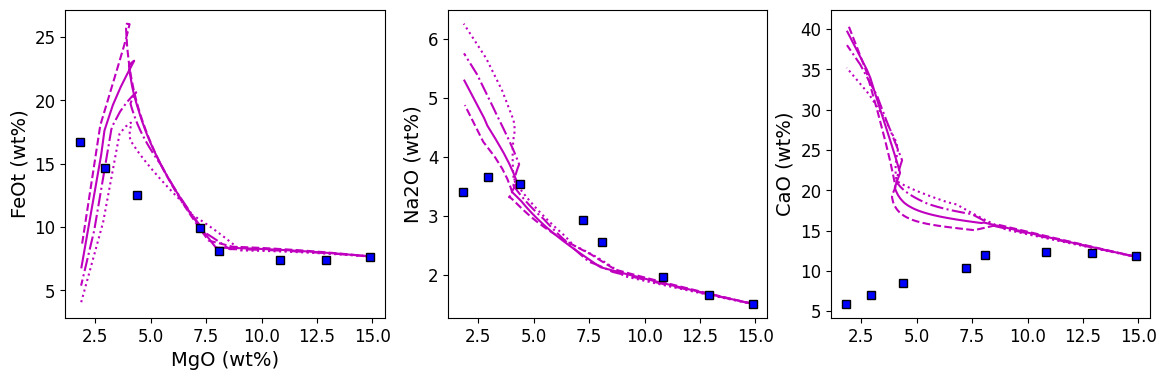

In [33]:
f, a = plt.subplots(1,3, figsize = (14,4), sharex = True)
y = ['FeOt_Liq', 'Na2O_Liq', 'CaO_Liq']
y2 = ['FeOt_melt', ' Na2O_melt', '  CaO_melt']

pet1['FeOt_melt'] = pet1['  FeO_melt'] + pet1['Fe2O3_melt']*(159.69/2)/71.844
pet4['FeOt_melt'] = pet4['  FeO_melt'] + pet4['Fe2O3_melt']*(159.69/2)/71.844
pet7['FeOt_melt'] = pet7['  FeO_melt'] + pet7['Fe2O3_melt']*(159.69/2)/71.844
pet10['FeOt_melt'] = pet10['  FeO_melt'] + pet10['Fe2O3_melt']*(159.69/2)/71.844

for i in range(3):
    a[i].plot(pet1['  MgO_melt'],
                 pet1[y2[i]], ':', color = 'm')
    a[i].plot(pet4['  MgO_melt'],
                 pet4[y2[i]], '-.', color = 'm')
    a[i].plot(pet7['  MgO_melt'],
                 pet7[y2[i]], '-', color = 'm')
    a[i].plot(pet10['  MgO_melt'],
                 pet10[y2[i]], '--', color = 'm')
    
    a[i].plot(Exp['MgO_Liq'], Exp[y[i]], 'sk', mfc = 'blue')

    a[i].set_ylabel(y[i][:-4] + ' (wt%)')
    a[0].set_xlabel('MgO (wt%)')


In [32]:
pet1.keys()

Index([' SiO2_magma', ' TiO2_magma', 'Al2O3_magma', 'Fe2O3_magma',
       '  FeO_magma', '  MnO_magma', '  MgO_magma', '  CaO_magma',
       ' Na2O_magma', '  K2O_magma', ' P2O5_magma', 'Cr2O3_magma', 'H2O_magma',
       ' SiO2_melt', ' TiO2_melt', 'Al2O3_melt', 'Fe2O3_melt', '  FeO_melt',
       '  MnO_melt', '  MgO_melt', '  CaO_melt', ' Na2O_melt', '  K2O_melt',
       ' P2O5_melt', 'Cr2O3_melt', 'H2O_melt', ' SiO2_cumulate',
       ' TiO2_cumulate', 'Al2O3_cumulate', 'Fe2O3_cumulate', '  FeO_cumulate',
       '  MnO_cumulate', '  MgO_cumulate', '  CaO_cumulate', ' Na2O_cumulate',
       '  K2O_cumulate', ' P2O5_cumulate', 'Cr2O3_cumulate', 'H2O_cumulate',
       'Temperature', 'Temperature_Olv', 'Temperature_Plg', 'Temperature_Cpx',
       'Temperature_Opx', 'Temperature_Pig', 'Temperature_Ilm',
       'Temperature_Mgt', 'Olv_Fo    _magma', 'Olv_Kd', 'Plg_An    _magma',
       'Cpx_Mg#Cpx_magma', 'Opx_Mg#Opx_magma', 'Pig_Mg#Pig_magma',
       'Ilm_Mg#Ilm_magma', 'Mgt_Mg#Mgt_magma',